# import all required libraries

In [2]:
# Import Libraries
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
from tensorflow.keras.utils import to_categorical

# define label

In [3]:
label = {
    "drive": 0,
    "legglance-flick": 1,
    "pullshot": 2,
    "sweep": 3
}

with open("label_map.pkl", "wb") as f:
    pickle.dump(label, f)

print("Saved label_map.pkl")

import pickle

with open("label_map.pkl", "rb") as f:
    label_map = pickle.load(f)

print("Loaded label:", label)

Saved label_map.pkl
Loaded label: {'drive': 0, 'legglance-flick': 1, 'pullshot': 2, 'sweep': 3}


# Load Image Paths and Encoded Labels

In [4]:
def load_paths_and_labels(data_dir):
    image_paths = []
    image_labels = []

    for class_name in os.listdir(data_dir):  # renamed from `label` to `class_name`
        folder_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(folder_path):
            continue
        for image in os.listdir(folder_path):
            if image.lower().endswith(('.jpg', '.jpeg', '.png')):
                full_path = os.path.join(folder_path, image)
                image_paths.append(full_path)
                image_labels.append(label[class_name.strip().lower()])  # use label dictionary

    return shuffle(image_paths, image_labels)


# image preproccing

In [5]:
IMG_SIZE = 224 

def preprocess_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path)
        if img is None:
            continue
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = (img / 255.0).astype(np.float32)
        images.append(img)
    return np.array(images)


# load data and test 

In [6]:
data_dir = "Data"

# Load paths and labels
image_paths, image_labels = load_paths_and_labels(data_dir)

# Preprocess images
X = preprocess_images(image_paths)
y = np.array(image_labels)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (3433, 224, 224, 3) (3433,)
Test set: (859, 224, 224, 3) (859,)


# sample image load

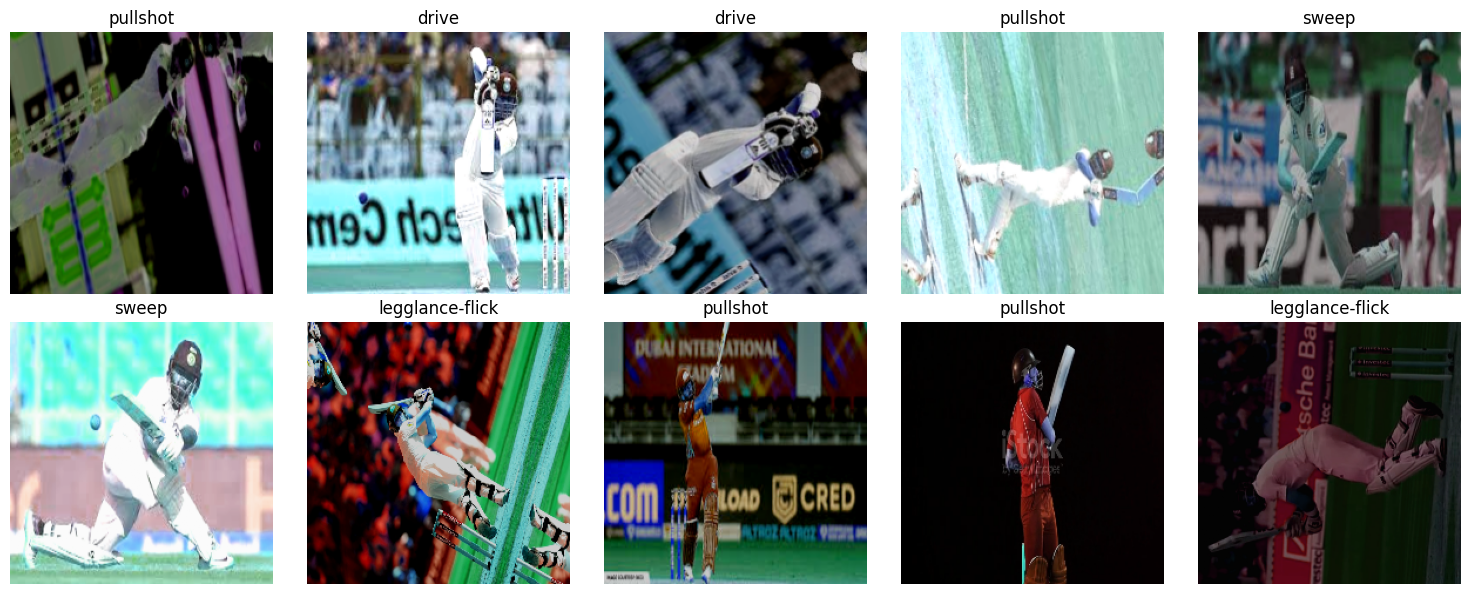

In [7]:
class_map = {v: k for k, v in label.items()}

plt.figure(figsize=(15, 6))  # width x height of full figure

for i in range(10):
    plt.subplot(2, 5, i+1)  # 2 rows, 5 columns
    plt.imshow(X_test[i])
    plt.title(f"{class_map[y_test[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


 # Convert Labels to Categorical

In [8]:
# Convert y to one-hot encoding (since it's a multi-class classification)
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)


# CNN Model

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # conv2d find pattern iamge scan small part of image 
    MaxPooling2D(pool_size=(2, 2)),                                    # reduces the size of image for better and farter learning and avoid noise

    Conv2D(64, (3, 3), activation='relu'),                             # relu : learn complex pattern and farter
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),                            # activation function use how many neurons active or not in model .
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),                                                         # covert 2D image to 1D image 
    Dense(128, activation='relu'),                                     # make dicison based on feature
    Dropout(0.5),                                                      # rendomly turnoff neurons during training avoid overfitting 

    Dense(4, activation='softmax')  # 4 classes                        # softmax use for multiclass classification feature
])


c:\Users\deepa\Cricket Shot Type Detection and Analysis\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# compile model

In [10]:
model.compile( optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'] )

# train model

In [11]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 109s 908ms/step - accuracy: 0.3749 - loss: 1.5242 - val_accuracy: 0.6740 - val_loss: 0.8271
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 83s 770ms/step - accuracy: 0.7410 - loss: 0.7354 - val_accuracy: 0.8184 - val_loss: 0.5214
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 90s 830ms/step - accuracy: 0.8336 - loss: 0.4449 - val_accuracy: 0.8719 - val_loss: 0.3988
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 98s 905ms/step - accuracy: 0.9142 - loss: 0.2407 - val_accuracy: 0.9010 - val_loss: 0.2844
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 84s 778ms/step - accuracy: 0.9341 - loss: 0.1924 - val_accuracy: 0.8685 - val_loss: 0.4031
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 103s 955ms/step - accuracy: 0.9579 - loss: 0.1339 - val_accuracy: 0.8999 - val_loss: 0.3487
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.9711 - loss: 0.0760 - val_accuracy: 0.8999 - val_loss: 0.4053
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 94s 861ms/step - accuracy: 0.9838 - loss: 0

# Plot Loss & Accuracy Curves

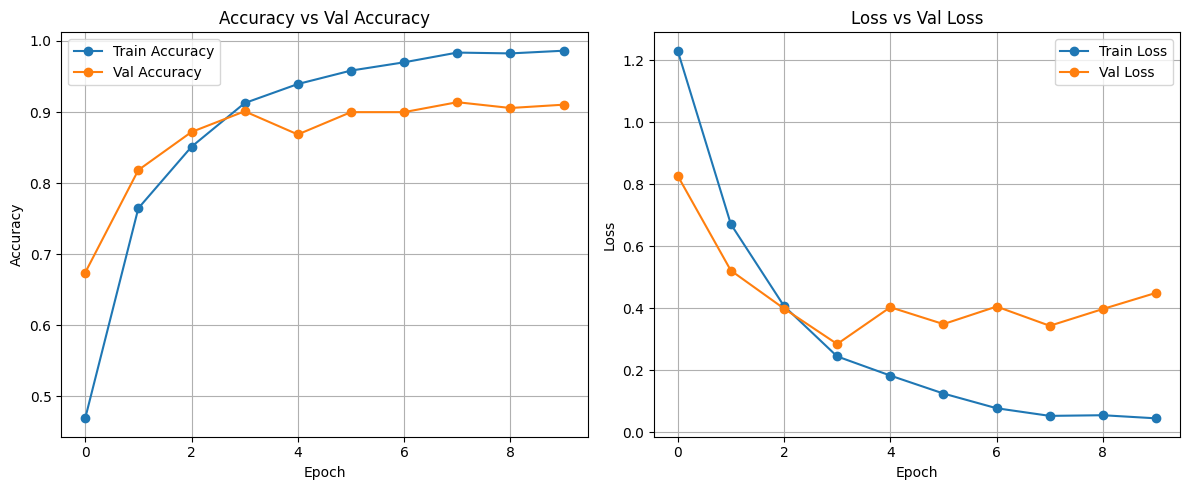

In [12]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Accuracy vs Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss vs Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#  Classification Report & Confusion Matrix

27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step
                 precision    recall  f1-score   support

          drive       0.96      0.77      0.86       135
legglance-flick       0.92      0.94      0.93       231
       pullshot       0.88      0.95      0.92       262
          sweep       0.91      0.92      0.91       231

       accuracy                           0.91       859
      macro avg       0.92      0.89      0.90       859
   weighted avg       0.91      0.91      0.91       859



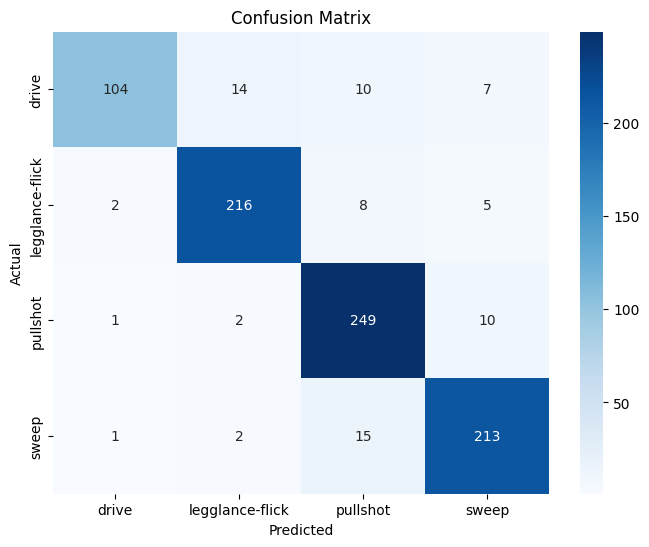

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)
class_names = ['drive', 'legglance-flick', 'pullshot', 'sweep']

print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# evaluate model

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 221ms/step - accuracy: 0.9078 - loss: 0.4546
Test Accuracy: 0.91


# save and load model

In [15]:
model.save("cricket_shot.h5")
loaded_model = load_model("cricket_shot.h5")

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Class labels
class_names = ['drive', 'legglance-flick', 'pullshot', 'sweep']

# Pick a random index from test set
i = random.randint(0, len(X_test) - 1)

# Get the image and true label
img = X_test[i]
true_label = class_names[np.argmax(y_test[i])]

# Predict using the loaded/trained model
pred_prob = model.predict(np.expand_dims(img, axis=0))[0]
pred_label = class_names[np.argmax(pred_prob)]
confidence = np.max(pred_prob) * 100

# Show image with prediction info
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {pred_label} ({confidence:.2f}%)\nActual: {true_label}")
plt.show()


NameError: name 'X_test' is not defined